In [22]:
import numpy 
import matplotlib.pyplot as plt 

In [23]:
import tensorflow as tf 

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Input, Flatten
from tensorflow.keras.optimizers import Adam

In [77]:

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print (x_train.shape)
x_train = x_train.reshape(60000,784)
print(x_train.shape)
x_test = x_test.reshape(10000,784)

(60000, 28, 28)
(60000, 784)


In [78]:
#Fit the input datas 

x_train = x_train / 255.0
x_test = x_test / 255.0 

In [26]:
#Create the model 

i = Input(shape =(784) )
x  = Dense(50,activation='relu')(i)
x  = Dense(2,activation='relu')(x)
x = Dense (784,activation = 'relu')(x)

model = Model(i,x)


model.summary()


Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_23 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 102       
_________________________________________________________________
dense_25 (Dense)             (None, 784)               2352      
Total params: 41,704
Trainable params: 41,704
Non-trainable params: 0
_________________________________________________________________


In [27]:
adam= Adam(learning_rate= 0.001)
model.compile(
  loss='mse',
  optimizer=adam,
  metrics=['accuracy']
)

In [28]:
r = model.fit(x_train, x_train, epochs=800,validation_data=(x_test,x_test), batch_size=8192,shuffle = True)

=============================] - 1s 126ms/step - loss: 0.0675 - accuracy: 0.0101 - val_loss: 0.0678 - val_accuracy: 0.0117
Epoch 662/800
8/8 [==============================] - 1s 130ms/step - loss: 0.0675 - accuracy: 0.0106 - val_loss: 0.0678 - val_accuracy: 0.0119
Epoch 663/800
8/8 [==============================] - 1s 119ms/step - loss: 0.0675 - accuracy: 0.0111 - val_loss: 0.0678 - val_accuracy: 0.0106
Epoch 664/800
8/8 [==============================] - 1s 116ms/step - loss: 0.0675 - accuracy: 0.0109 - val_loss: 0.0678 - val_accuracy: 0.0110
Epoch 665/800
8/8 [==============================] - 1s 113ms/step - loss: 0.0675 - accuracy: 0.0110 - val_loss: 0.0678 - val_accuracy: 0.0119
Epoch 666/800
8/8 [==============================] - 1s 154ms/step - loss: 0.0675 - accuracy: 0.0101 - val_loss: 0.0678 - val_accuracy: 0.0126
Epoch 667/800
8/8 [==============================] - 1s 120ms/step - loss: 0.0675 - accuracy: 0.0106 - val_loss: 0.0678 - val_accuracy: 0.0107
Epoch 668/800
8/8 [

3


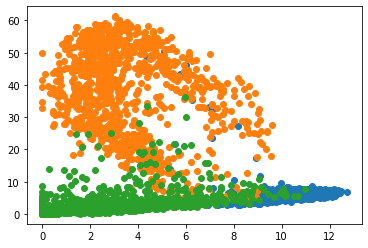

In [79]:
import numpy as np
i2 = Input(shape =(784) )
x2  = Dense(50,activation='relu')(i2)
x2  = Dense(2,activation='relu')(x2)
encoder  = Model (i2,x2)
encoder.layers[1].set_weights(model.layers[1].get_weights())
encoder.layers[2].set_weights(model.layers[2].get_weights())

idx = np.argsort(y_test)
L1 = [idx[1000:2000]]
L2 = [idx[:1000]]
L3 = [idx[9000:10000]]
L = L1 + L2 + L3 
a1 = encoder.predict(x_test)[idx[:1000],0]
b1 = encoder.predict(x_test)[idx[:1000],1]
a2 = encoder.predict(x_test)[idx[1000:2000],0]
b2 = encoder.predict(x_test)[idx[1000:2000],1]
a3 = encoder.predict(x_test)[idx[9000:10000],0]
b3 = encoder.predict(x_test)[idx[9000:10000],1]
print(len(L))
plt.scatter(a1,b1)#,c = y_test[idx[:1000]])
plt.scatter(a2,b2)#,c = y_test[idx[1000:2000]])
plt.scatter(a3,b3)#{},c = y_test[idx[9000:10000]])
plt.show()


[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7]


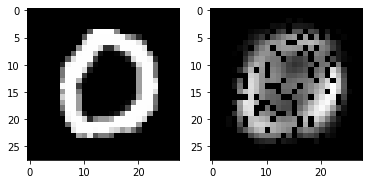

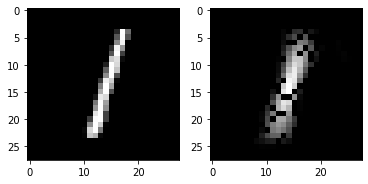

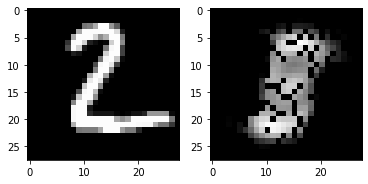

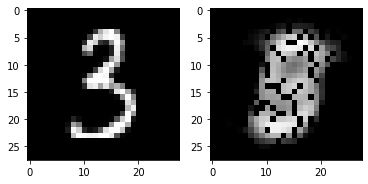

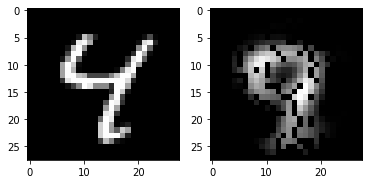

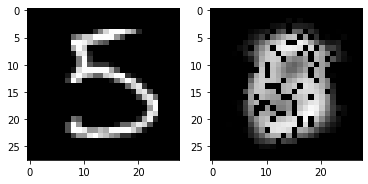

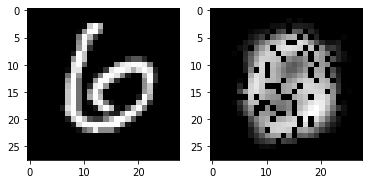

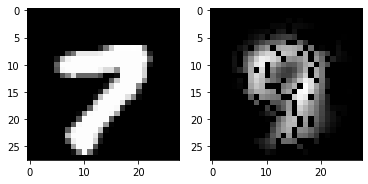

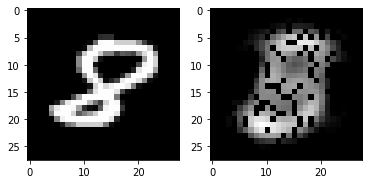

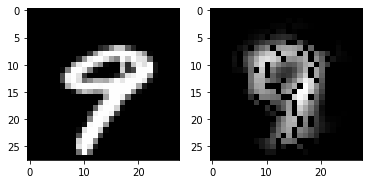

In [50]:
#COmpare the inputs and the outputs of the image 
x_train = x_train.reshape(60000,28,28)
x_train = x_train * 255 
a = model.predict(x_test)
x_test = x_test.reshape(10000,28,28)
x_test = x_test * 255 
a = a.reshape(10000,28,28)
L = [71,2,1,76,6,15,11,79,61,9]
print(y_test[:80])
for i in range (10): 
    plt.subplot(121)
    plt.imshow(x_test[L[i]],cmap = 'gray')
    plt.subplot(122)
    plt.imshow(a[L[i]],cmap = 'gray')
    plt.show()


In [80]:
print(model.layers[1].get_weights()[0][1])

[-0.01960284  0.00723062  0.04527292  0.03617324 -0.04826262  0.02413271
  0.02291932  0.04248389 -0.00126226  0.04131467  0.02428437  0.05341472
  0.07506641 -0.02233613  0.0306989   0.0378956  -0.04038259  0.06876572
 -0.02114332 -0.03371339  0.03205483 -0.01790232  0.07278598  0.04634859
  0.04065909  0.00153126  0.04000482  0.05270327  0.08413734 -0.03979768
  0.00155453 -0.06378531  0.07108473  0.01032171 -0.00585902 -0.00312551
 -0.00640643 -0.08179326  0.05260132  0.08086463  0.04452332 -0.06219332
  0.00825588 -0.0566358  -0.0461278   0.01177243  0.01496603  0.00340188
  0.0078781  -0.07190487]


0


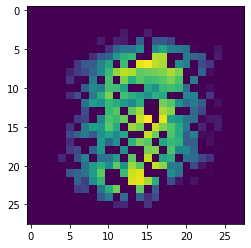

In [30]:

x_1 = x_1.reshape(1,784)
print (y_train[1])
a = model.predict(x_1)
a = a.reshape(28,28)
plt.imshow(a)

In [26]:
output_encoder = model.layer[2].output 

AttributeError: 'Model' object has no attribute 'layer'